# "Almost" translation-invariant random spin chain boundary state

Models coarse-grained boundary of 2D architecture as an almost translation-invariant chain of maximally entangled states, similar to "nontrivial example" from ```arXiV:1911.09819```. The random isometry applied is the Stinespring dilation (i.e. unitary operation applied on the coarse-grained boundary and environment blocks of two adjacent sites) of the channel $\varepsilon_U = \frac{1}{4} \sum (P_i \otimes P_i U) \cdot (P_i \otimes U^\dagger P_i)$ (1) on the boundary block, where $U$ is a random unitary. Random noise is then applied across the chain.

In [1]:
import numpy as np
import math
import tensornetwork as tn
from scipy.stats import unitary_group as ug
# from ast import literal_eval
from scipy import linalg

In [2]:
from matplotlib import pyplot as plt

In [3]:
def noisy_ctrl_rti_chain(l,eps,d=4,closed=False):
    """
    Returns an "almost" translation-invariant random spin chain with size eps noise applied across the chain.
    """
    q = d ** (1/2)
    if (q != int(q)):
        print("Error: local dimension must be an integer.")
        return result
    if (q < 2):
        print("Error: local dimension must be at least 2.")
        return result
    I,X,Y,Z = paulis(q=d)
    chain = [max_entangled_node(d,name=str(i)) for i in range(l)]
    vs = random_iso_chain(l,d=d,closed=closed)
    e = []
    for i in range(l):
        H = gue(d)
        e.append(tn.Node(linalg.qr(np.eye(d) + 1j*(Z+eps*np.asarray(H)))[0],name='E_'+str(i)))
        # TODO: test effect on wiring
        chain[i][1] ^ vs[i][0]
        chain[(i+1) % l][0] ^ e[i][0]
        e[i][1] ^ vs[i][1]
    return chain,vs,e

def noisy_rti_chain(l,eps,d=4,closed=False):
    """
    Returns an "almost" translation-invariant random spin chain with size eps noise applied across the chain.
    """
    q = d ** (1/2)
    if (q != int(q)):
        print("Error: local dimension must be an integer.")
        return result
    if (q < 2):
        print("Error: local dimension must be at least 2.")
        return result
    I,X,Y,Z = paulis(q=d)
    chain = [max_entangled_node(d,name=str(i)) for i in range(l)]
    vs = random_iso_chain(l,d=d,closed=closed)
    e = []
    for i in range(l):
        H = gue(d)
        e.append(tn.Node(linalg.qr(np.eye(d) + 1j*eps*np.asarray(H))[0],name='E_'+str(i)))
        # TODO: test effect on wiring
        chain[i][1] ^ vs[i][0]
        chain[(i+1) % l][0] ^ e[i][0]
        e[i][1] ^ vs[i][1]
    return chain,vs,e

def noisy_chains(lis,eps,d=4,closed=False):
    """
    Returns "almost" translation-invariant random spin chains of given lenghts modeling the boundary of a 2D region.
    """
    result = []
    q = d ** (1/2)
    if (q != int(q)):
        print("Error: local dimension must be an integer.")
        return result
    if (q < 2):
        print("Error: local dimension must be at least 2.")
        return result
    q = int(q)
    U = ug.rvs(q)
    for l in lis:
        if (l != int(l)):
            print("Error: length of chain must be an integer.")
            return []
        chain = [max_entangled_node(d,name=str(i)) for i in range(l)]
        vs = iso_chain_U(U,l,d=d,closed=closed)
        I,X,Y,Z = paulis(q=d)
        e = []
        for i in range(len(vs)):
            H = gue(d)
            e.append(tn.Node(linalg.qr(np.eye(d) + 1j*eps*np.asarray(H))[0],name='E_'+str(i)))
            chain[i][1] ^ vs[i][0]
            chain[(i+1) % l][0] ^ e[i][0]
            e[i][1] ^ vs[i][1]
        result.append((chain,vs,e))
    return result

def iso_chain_U(U,l,d=4,closed=False):
    if (d < 4):
        print("Error: bond dimension must be at least 4.")
        return []
    n = l if closed else l-1
    q = d ** (1/2)
    if (q != int(q)):
        print("Error: local dimension must be an integer.")
        return [], []
    if (q < 2):
        print("Error: local dimension must be at least 2.")
        return [], []
    q = int(q)
    vs = [iso_U(U,d=d,name='V_'+str(i)) for i in range(n)]
    if (not closed):
        vs.append(tn.Node(np.eye(d**2).reshape((d,d,d,d)),name='bound'))
    return vs

def rti_chain(l,d=4,closed=False):
    """
    Returns a translation-invariant random spin chain modeling the boundary of a 2D region.
    """
    if (l != int(l)):
        print("Error: length of chain must be an integer.")
        return [], []
    chain = [max_entangled_node(d,name=str(i)) for i in range(l)]
    vs = random_iso_chain(l,d=d,closed=closed)
    for i in range(len(vs)):
        chain[i][1] ^ vs[i][0]
        chain[(i+1) % l][0] ^ vs[i][1]
    return chain, vs

def random_iso_chain(l,d=4,closed=False):
    """
    Returns a list of nodes representing identical isometries, which is sampled randomly as defined in (1).
    Indices 0 and 1 represent the environment and boundary input blocks, respectively, and indices 2 and 3 represent the output environment and boundary qudits.
    """
    if (d < 4):
        print("Error: bond dimension must be at least 4.")
        return []
    n = l if closed else l-1
    q = d ** (1/2)
    if (q != int(q)):
        print("Error: local dimension must be an integer.")
        return [], []
    if (q < 2):
        print("Error: local dimension must be at least 2.")
        return [], []
    q = int(q)
    U = ug.rvs(q)
    result = [iso_U(U,d=d,name='V_'+str(i)) for i in range(n)]
    if (not closed):
        result.append(tn.Node(np.eye(d**2).reshape((d,d,d,d)),name='bound'))
    return result

def random_iso(d=4,name=None):
    """
    Returns a single node representing a random isometry on a pair of adjacent environment and boundary qudit indices as defined in (1).
    Indices 0 and 1 represent the environment and boundary input blocks, respectively, and indices 2 and 3 represent the output environment and boundary qudits.
    """
    if (d < 4):
        print("Error: bond dimension must be at least 4.")
        return
    q = d ** (1/2)
    if (q != int(q)):
        print("Error: local dimension must be an integer.")
        return [], []
    if (q < 2):
        print("Error: local dimension must be at least 2.")
        return [], []
    q = int(q)
    U = ug.rvs(q)
    return iso_U(U,d=d,name=name)

def iso_U(U,d=4,name=None):
    """
    Returns a single node representing a random isometry defined as in (1) by U.
    Indices 0 and 1 represent the environment and boundary input blocks, respectively, and indices 2 and 3 represent the output environment and boundary qudits.
    """
    if (d < 4):
        print("Error: bond dimension must be at least 4.")
        return
    q = d ** (1/2)
    if (q != int(q)):
        print("Error: local dimension must be an integer.")
        return [], []
    if (q < 2):
        print("Error: local dimension must be at least 2.")
        return [], []
    q = int(q)
    A = np.asarray(np.zeros((d,d,d,d)),dtype='complex')    # Indices 0-1 are environment qudits in +- basis, followed by inputs and outputs
    I,X,Y,Z = paulis(q=q)
    A[0][0] = np.kron(I,U)
    A[1][1] = np.kron(X,X@U)
    A[2][2] = np.kron(Y,Y@U)
    A[3][3] = np.kron(Z,Z@U)
#     A[1][1] = np.kron(X,X@U@ug.rvs(q))
#     A[2][2] = np.kron(Y,Y@U@ug.rvs(q))
#     A[3][3] = np.kron(Z,Z@U@ug.rvs(q))
    A = tn.Node(A.transpose([0,2,1,3]))
    H = tn.Node(proj_hadamard(d=d))
#     V = tn.contract(H[0] ^ A[0])
    H[0] ^ A[0]
    V = tn.contractors.greedy([H,A],output_edge_order=[H[1],A[1],A[2],A[3]])
    V.set_name(name)
    return V

def max_entangled_node(d,name=None):
    """
    Returns a maximally entangled state with Schmidt rank d. Indices 0 and 1 are input state legs.
    """
    u = np.asarray([[0 for j in range(d)] for i in range(d)])
    for i in range(d):
        u[i][i] = 1
    return tn.Node(1/(d**0.5) * u, name=name)

def proj_hadamard(d=4):
    """
    Returns the operator which projects onto d = 4 and acts on a dimension 4 state as a pair of hadamards on two qubits.
    """
    H = np.asarray([[1 for i in range(d)], [-1 for i in range(d)], [-1 for i in range(d)], [1 for i in range(d)]])
    H[1][0] = 1
    H[2][0] = 1
    H[2][1] = 1
    H[-1][1] = -1
    H[1][2] = 1
    H[-1][2] = -1
    return 1/2 * H

def paulis(q=2):
    """
    Returns the identy, shift (X), Y, and clock (Z) matrices for local dimension q as a tuple of ndarrays.
    """
    if (q != int(q)):
        print("Error: local dimension must be an integer.")
        return
    if (q < 2):
        print("Error: local dimension must be at least 2.")
        return
    q = int(q)
    x = np.asarray([[0 for j in range(q)] for i in range(q)],dtype='complex')
    z = np.asarray([[0 for j in range(q)] for i in range(q)],dtype='complex')
    for i in range(q):
        x[i][i-1] = 1
        z[i][i] = np.e ** (1j*2*np.pi*i/q)
    y = -1j * z @ x
    return np.eye(q),x,y,z

def random_unitary_error(eps,q=4):
    """
    Returns
    """
    return linalg.qr(np.eye(q) + 1j*eps*gue(d)/2)[0]

In [4]:
def gue(n):
    """
    Returns
    """
    A = np.random.normal(size=(n,n),scale=1/n**0.5) + 1j*np.random.normal(size=(n,n),scale=1/n**0.5)
    return (A + np.conjugate(A.T))/4

In [5]:
def renyi(rho, alpha, b=np.e):
    """
    Returns
    """
    return 1/(1-alpha) * np.log(np.trace(np.linalg.fractional_matrix_power(rho,alpha)))/np.log(b)

def renyi_n(rho, alpha, b=np.e):
    """
    Returns
    """
    return 1/(1-alpha) * np.log(np.trace(np.linalg.matrix_power(rho,alpha)))/np.log(b)

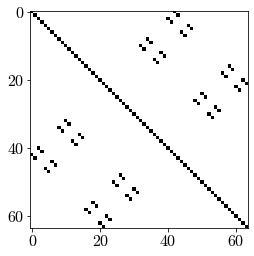

Von Neumann entropy: 	 (4.999999999999999-1.3490872200235705e-17j)
Renyi alpha = 2: 	 (5.000000000000002-0j)
Renyi alpha = 3: 	 (5.000000000000001-1.0175279223145852e-34j)


In [149]:
l = 3
chain,vs=rti_chain(l,d=4,closed=True)
res = tn.contractors.greedy(chain+vs,output_edge_order=[vs[i//2][2+i%2]  for i in range(2*l)])
copy = tn.Node(np.conjugate(res.get_tensor()))
for i in range(l):
    res[2*i] ^ copy[2*i]
rho = tn.contractors.greedy([res, copy],output_edge_order=[res[i] for i in range(1,2*l,2)]+[copy[i] for i in range(1,2*l,2)])
s = rho.get_tensor().reshape((4**l,4**l))

# visualization
plt.clf()
plt.imshow(np.abs(s),interpolation='nearest',cmap='Greys')
plt.show()

# compute entropy
print("Von Neumann entropy: \t", - np.trace(s @ linalg.logm(s)/np.log(2)))

# compute renyis
print("Renyi alpha = 2: \t", renyi_n(s, 2, 2))
print("Renyi alpha = 3: \t", renyi_n(s, 3, 2))

noisy version!


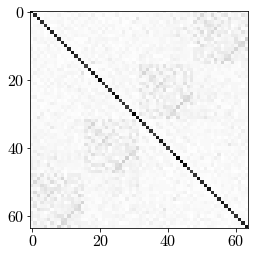

Von Neumann entropy: 	 (5.510888407139861+2.813556359246623e-17j)
Renyi alpha = 2: 	 (5.334674119768945-0j)
Renyi alpha = 3: 	 (5.241227834778934-1.0764492549432333e-18j)


In [82]:
# noisy version
l = 3
eps = 0.5
print('noisy version!')
chain,vs,e=noisy_ctrl_rti_chain(l,eps,d=4,closed=True)
res = tn.contractors.greedy(chain+vs+e,output_edge_order=[vs[i//2][2+i%2] for i in range(2*l)])
copy = tn.Node(np.conjugate(res.get_tensor()))
for i in range(l):
    res[2*i] ^ copy[2*i]
rho = tn.contractors.greedy([res, copy],output_edge_order=[res[i] for i in range(1,2*l,2)]+[copy[i] for i in range(1,2*l,2)])
s = rho.get_tensor().reshape((4**l,4**l))

# visualization
plt.clf()
plt.imshow(np.abs(s),interpolation='nearest',cmap='Greys')
plt.show()

# compute entropy
print("Von Neumann entropy: \t", - np.trace(s @ linalg.logm(s)/np.log(2)))

# compute renyis
print("Renyi alpha = 2: \t", renyi_n(s, 2, 2))
print("Renyi alpha = 3: \t", renyi_n(s, 3, 2))

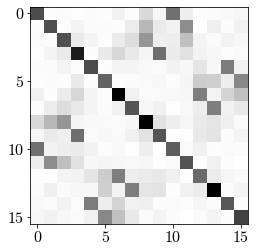

Von Neumann entropy: 	 (3.1851990345049046+3.003212347326486e-17j)
Renyi alpha = 2: 	 (3.064280520593214-0j)
Renyi alpha = 3: 	 (3.0275333916689604+9.851748519190469e-19j)


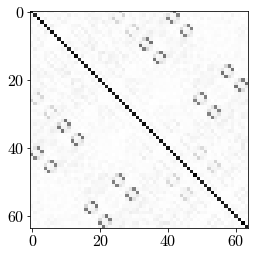

Von Neumann entropy: 	 (5.415468153015944+4.7409108979035795e-17j)
Renyi alpha = 2: 	 (5.246836599656813-0j)
Renyi alpha = 3: 	 (5.185389761570988+4.781103310364043e-19j)


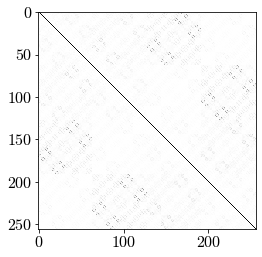

Von Neumann entropy: 	 (7.553829890502746-3.406353523019486e-19j)
Renyi alpha = 2: 	 (7.387081844495795-0j)
Renyi alpha = 3: 	 (7.313729447206474-1.0961109645475337e-18j)


In [84]:
lis = [2,3,4]
chains = noisy_chains(lis,0.9,d=4,closed=True)
for ch in chains:
    chain,vs,e=ch
    l = len(chain)
    res = tn.contractors.greedy(chain+vs+e,output_edge_order=[vs[i//2][2+i%2] for i in range(2*l)])
    copy = tn.Node(np.conjugate(res.get_tensor()))
    for i in range(l):
        res[2*i] ^ copy[2*i]
    rho = tn.contractors.greedy([res, copy],output_edge_order=[res[i] for i in range(1,2*l,2)]+[copy[i] for i in range(1,2*l,2)])
    s = rho.get_tensor().reshape((4**l,4**l))

    # visualization
    plt.clf()
    plt.imshow(np.abs(s),interpolation='nearest',cmap='Greys')
    plt.show()

    # compute entropy
    print("Von Neumann entropy: \t", - np.trace(s @ linalg.logm(s)/np.log(2)))

    # compute renyis
    print("Renyi alpha = 2: \t", renyi_n(s, 2, 2))
    print("Renyi alpha = 3: \t", renyi_n(s, 3, 2))

In [135]:
# compare VN and Renyis
lis = [2,3,4,5]
r = [2,3,4]
eps = 1.0
f = open('output/compare_renyis_' + str(lis) + '_' + str(r) + '_' + str(eps), 'a')
for i in range(50):
    print(i)
    chains = noisy_chains(lis,eps,d=4,closed=True)
    result = ''
    for ch in chains:
        chain,vs,e=ch
        l = len(chain)
        res = tn.contractors.greedy(chain+vs+e,output_edge_order=[vs[i//2][2+i%2] for i in range(2*l)])
        copy = tn.Node(np.conjugate(res.get_tensor()))
        for i in range(l):
            res[2*i] ^ copy[2*i]
        rho = tn.contractors.greedy([res, copy],output_edge_order=[res[i] for i in range(1,2*l,2)]+[copy[i] for i in range(1,2*l,2)])
        s = rho.get_tensor().reshape((4**l,4**l))
        result += str(np.real(- np.trace(s @ linalg.logm(s)/np.log(2)))) + ','
        for alpha in r:
            result += str(np.real(renyi_n(s,alpha,2))) + ','
    f.write(result)
    f.write('\n')
f.close()

0
1
logm result may be inaccurate, approximate err = 2.412316632610202e-13
2
3
4
logm result may be inaccurate, approximate err = 2.373399688443591e-13
5
logm result may be inaccurate, approximate err = 2.7011699111260105e-13
6
logm result may be inaccurate, approximate err = 2.7482430897471506e-13
7
8
logm result may be inaccurate, approximate err = 2.598023993035068e-13
9
10
11
logm result may be inaccurate, approximate err = 2.9553670554909594e-13
12
logm result may be inaccurate, approximate err = 2.4504013397186755e-13
13
logm result may be inaccurate, approximate err = 3.42586059232962e-13
14
logm result may be inaccurate, approximate err = 2.429423927833436e-13
15
logm result may be inaccurate, approximate err = 3.265602680554882e-13
16
17
logm result may be inaccurate, approximate err = 2.5041950365149574e-13
18
logm result may be inaccurate, approximate err = 2.2682012458231962e-13
19
logm result may be inaccurate, approximate err = 2.535241894420758e-13
20
logm result may be 

In [6]:
import matplotlib.font_manager

In [7]:
from matplotlib import cm
cmap = cm.get_cmap('inferno')

In [10]:
lis = [2,3,4,5]
r = [2,3,4]
eps = 0.5
f = open('output/compare_renyis_' + str(lis) + '_' + str(r) + '_' + str(eps), 'r')
tables = [[] for _ in range(len(lis)*(len(r)+1))]
while True:
    line = f.readline()
    if line == '':
        break
    read = line.strip().strip(',').split(',')
    for i in range(len(lis)*(len(r)+1)):
        tables[i].append(float(read[i]))
f.close()

<Figure size 432x288 with 0 Axes>

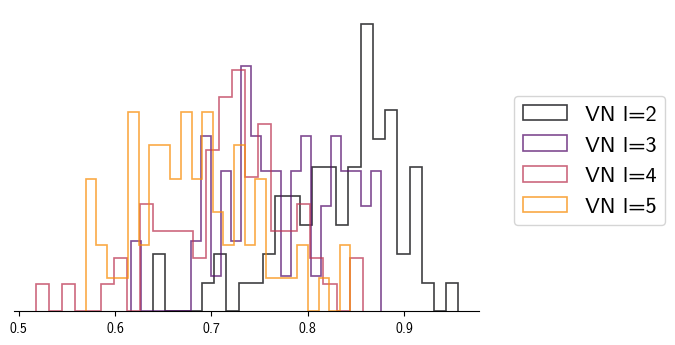

In [11]:
plt.clf()
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
n, bins, patches = plt.hist([4 - i for i in tables[0]], bins=25, density=True, histtype='step', color=cmap(0), alpha=0.75, linewidth=1.2, label='VN l=2')
n, bins, patches = plt.hist([6 - i for i in tables[4]], bins=25, histtype='step', density=True, color=cmap(1/4), alpha=0.75, linewidth=1.2, label='VN l=3')
n, bins, patches = plt.hist([8 - i for i in tables[8]], bins=25, histtype='step', density=True, color=cmap(2/4), alpha=0.75, linewidth=1.2, label='VN l=4')
n, bins, patches = plt.hist([10 - i for i in tables[12]], bins=25, histtype='step', density=True, color=cmap(3/4), alpha=0.75, linewidth=1.2, label='VN l=5')
for tick in ax.get_xticklabels():
    tick.set_fontname("cmss10")
    #tick.set_fontname("cmr10")
#plt.xlabel('Mana of output state')
#plt.ylabel('Frequency')
#plt.title('Mana distribution')
#font = {'size':20, 'family':'serif', 'serif': ['computer modern roman']}
#plt.rc('font',**font)
fig.set_size_inches(6, 4)
fig.set_dpi(100)
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)
plt.rcParams.update({'font.size': 16})
plt.legend(bbox_to_anchor=(1.05, 0.75), loc='upper left', prop={'family': 'cmss10'})
#plt.grid(True)
# plt.show()
plt.savefig('plots/comp_'+str(lis)+'_'+str(eps)+'.pdf', bbox_inches='tight', pad_inches=0.5)

<Figure size 432x288 with 0 Axes>

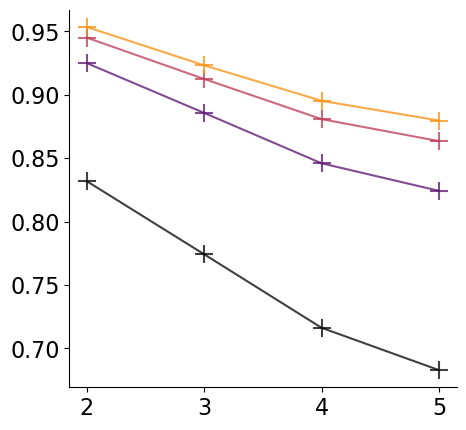

In [12]:
plt.clf()
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for i in range(len(r)+1):
    plt.scatter(lis, [2*lis[j]-np.average(tables[4*j+i]) for j in range(len(lis))], color=cmap(i/(len(r)+1)), alpha=0.75, linewidth=1.5, marker='+', s=150, label='')
    plt.plot(lis, [2*lis[j]-np.average(tables[4*j+i]) for j in range(len(lis))], color=cmap(i/(len(r)+1)), alpha=0.75, linewidth=1.5, label='')
# plt.xlabel('Circuit depth')
# plt.ylabel('Average sum negativity')
#plt.title('Title')
fig.set_size_inches(5, 5)
fig.set_dpi(100)
frame = plt.gca()
#frame.axes.get_yaxis().set_visible(False)
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'cmss10'})
# plt.rcParams.update({'font.family': 'cmr10'})
# plt.xlim([5, 110])
# plt.show()
# plt.savefig('plots/conv_1d_3.png', bbox_inches='tight', pad_inches=0, transparent=True)
plt.savefig('plots/conv_'+str(lis)+'_'+str(eps)+'.pdf', bbox_inches='tight', pad_inches=0)

<Figure size 432x288 with 0 Axes>

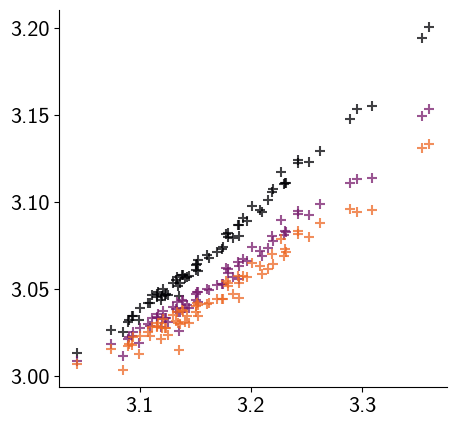

In [13]:
plt.clf()
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for i in range(len(r)):
    plt.scatter(tables[0], tables[i+1], color=cmap(i/len(r)), alpha=0.75, linewidth=1.5, marker='+', s=50, label='')
# plt.xlabel('Circuit depth')
# plt.ylabel('Average sum negativity')
#plt.title('Title')
fig.set_size_inches(5, 5)
fig.set_dpi(100)
frame = plt.gca()
#frame.axes.get_yaxis().set_visible(False)
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'cmss10'})
# plt.rcParams.update({'font.family': 'cmr10'})
#plt.grid(True)
#plt.legend(bbox_to_anchor=(1, 0.85), loc='upper right')
# plt.text(85, 1, 'n = 3', horizontalalignment='left')
# plt.text(85, 2.5, 'n = 4', horizontalalignment='left')
# plt.text(85, 5.1, 'n = 5', horizontalalignment='left')
# plt.ylim([0, 6.5])
# plt.xlim([5, 110])
# plt.show()
# plt.savefig('plots/conv_1d_3.png', bbox_inches='tight', pad_inches=0, transparent=True)
plt.savefig('plots/renyi_'+str(lis)+'_'+str(eps)+'.pdf', bbox_inches='tight', pad_inches=0)